# HW8-CHEN (total 78, 22 free)

In [26]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
%matplotlib inline

## Ch4-13 (10 pts)
Draw the cubic spline found in Example 4.10. You can directly use the coefficients found in (4.16)-(4.19). You need to use the command np.polyval, and each piece needs to have a different color.

In [2]:
# put the coefficients from (4.16)-(4.19) into a matrix
coeff = np.array([[5/8,-9/8,-1/8,5/8],
                  [0,15/8,-3/2,-15/8],
                  [-5/8,5/4,13/8,-7/4],
                  [0,0,2,2]])

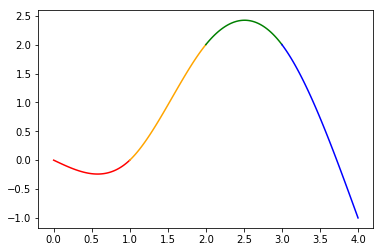

In [3]:
x = np.array([0,1,2,3,4])
t1 = np.arange(x[0],x[1]+0.01,0.01)
plt.plot(t1, np.polyval(coeff[:,0], t1-x[0]), color='r')
t2 = np.arange(x[1],x[2]+0.01,0.01)
plt.plot(t2, np.polyval(coeff[:,1], t2-x[1]), color='orange')
t3 = np.arange(x[2],x[3]+0.01,0.01)
plt.plot(t3, np.polyval(coeff[:,2], t3-x[2]), color='green')
t4 = np.arange(x[3],x[4]+0.01,0.01)
plt.plot(t4, np.polyval(coeff[:,3], t4-x[3]), color='blue')
plt.show()

## Ch4-14 (15 pts)

### (a) 
Write a function pp = myspline(x, y) to return the natural cubic spline that interpolates the data x = (x0,x1,··· ,xn), y = (y0,y1,··· ,yn). The output pp should be a 4 by n matrix where one column corresponds to the coefficients of one piece.

In [27]:
def myspline(x,y):
    # x are nodes (x value) = [x0,x1,...,xn]
    # y are function values (y value) = [y0,y1,...,yn]
    # returns an 4 by n array pp. Its ith column pp[:,i] gives the coeff for the ith piece as
    # p_i(x) = pp[0,i]*(x-x[i])**3 + pp[1,i]*(x-x[i])**2 + pp[2,i]*(x-x[i]) + pp[3,i]
    
    n = len(x) - 1
    h = x[1:] - x[:n] # this is the vector that stores the length of subintervals, length n

    # construct the tridiagonal matrix H
    D = 1/3*np.diag(h[:n-1]+h[1:]); # (n-1)*(n-1); diagonal entries
    UD = 1/6*np.triu(np.roll(np.diag(h[1:]),1),1) # upper diagonal entries
    LD = 1/6*np.tril(np.roll(np.diag(h[:n-1]),-1),-1) # lower diagonal entries
    if n==2:
        H = D
    else:
        H = D + UD + LD
        
    # construct the right hand side
    df = (y[1:] - y[:n])/h; # length n
    # df=[(y1-y0)/h1,(y2-y1)/h2,...,(yn-yn-1)/hn ]
    ddf = df[1:] - df[:n-1]
    # solve for z1,...,zn-1
    z = np.zeros(n+1)
    z[1:n] = np.linalg.solve(H,ddf)
    
    # compute coefficients
    pp = np.zeros([4,n])
    pp[0,:] = (-z[:n]+z[1:])/h/6; # for (x-xi)^3
    pp[1,:] = z[:n]/2; # for (x-xi)^2
    pp[2,:] = (y[1:]-y[:n])/h - h*(z[1:]/6+z[:n]/3) # for x-xi
    pp[3,:] = y[:n] # constant term
    return pp

### (b)
Test on Example 4.10

In [28]:
x = np.array([0, 1, 2, 3, 4]); y = np.array([0, 0, 2, 2, -1])

In [29]:
pp = myspline(x,y);pp

array([[ 0.625, -1.125, -0.125,  0.625],
       [ 0.   ,  1.875, -1.5  , -1.875],
       [-0.625,  1.25 ,  1.625, -1.75 ],
       [ 0.   ,  0.   ,  2.   ,  2.   ]])

## Ch4-15 (10 pts)
Use myspline to construct the natural cubic spline for the following data. Print the coefficient matrix.

### (a)

In [30]:
xa = np.array([-0.5, -0.25, 0]);ya =np.array([-0.02475, 0.3349375, 1.101])

In [31]:
pp15a = myspline(xa,ya);pp15a

array([[ 6.502    , -6.502    ],
       [ 0.       ,  4.8765   ],
       [ 1.032375 ,  2.2515   ],
       [-0.02475  ,  0.3349375]])

In [38]:
# pp15ap = CubicSpline(xa,ya,bc_type='natural');pp15ap.c

### (b)

In [9]:
xb =np.array([0.1, 0.2, 0.3, 0.5]); yb =np.array([0.90483742,0.81873075,0.74081822,0.60653066]);
pp15b = myspline(xb,yb);pp15b

array([[ 1.66939522, -0.15283609, -0.75827957],
       [ 0.        ,  0.50081857,  0.45496774],
       [-0.87776065, -0.8276788 , -0.73210017],
       [ 0.90483742,  0.81873075,  0.74081822]])

## Ch4-16 (10 pts)
The data in Exercise 15 were generated using the following functions. Use the cubic spline constructed to do the following approximation and print the true value as well.

### (a)

In [10]:
# we should use the first piece
a=-1/3
print('f(-1/3) is approximated as',np.polyval(pp15a[:,0],a-xa[0]),
      '. Its true value is',np.polyval([1,4.001,4.002,1.101],a))
print("f'(-1/3) is approximated as",np.polyval(pp15a[:3,0]*[3,2,1],a-xa[0]),
     ". Its true value is",np.polyval(np.array([1,4.001,4.002])*[3,2,1],a))

f(-1/3) is approximated as 0.17741435185185186 . Its true value is 0.17451851851851863
f'(-1/3) is approximated as 1.5742083333333334 . Its true value is 1.6679999999999997


### (b)

In [11]:
b = 0.25 # we should use the 2nd piece
print('f(0.25) is approximated as',np.polyval(pp15b[:,1],b-xb[1]),
      '. Its true value is',np.exp(-b))
print("f'(0.25) is approximated as",np.polyval(pp15b[:3,1]*[3,2,1],b-xb[1]),
     ". Its true value is",-np.exp(-b))

f(0.25) is approximated as 0.7785797521195652 . Its true value is 0.7788007830714049
f'(0.25) is approximated as -0.7787432097826087 . Its true value is -0.7788007830714049


## Ch4-17 (10 pts)
Interpolate the Runge function on [-1,1] at 11 equally spaced points. Plot the interpolant and the Runge function in ONE figure, but with Runge in dash and the spline in solid line. How is this spline performing compared to Figure 4.1(b) or Figure 4.2(b)?

In [33]:
def Runge(x): return 1/(1+25*x**2)
n = 10
x17 = np.linspace(-1,1,n+1)
y17 = Runge(x17)
cs17 = CubicSpline(x17,y17,bc_type='natural')

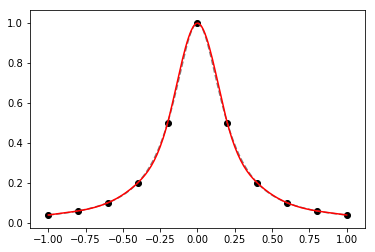

In [13]:
t = np.arange(-1,1+0.01,0.01)
plt.plot(t,Runge(t), color='grey', linestyle='--')
plt.scatter(x17,y17, color='k')
plt.plot(t,cs17(t), color='red')
plt.show()

This looks a lot better than the ones in Figure 4.1(b) and Figure 4.2(b).

## Ch4-18 (15 pts)

### (a)
Note that the data on 3/29 is missing. Find an estimation of the cumulative number of cases on 3/29 by interpolating these 16 points via myspline.

In [34]:
T = np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16])
# T are the nodes. 0 is 3/23. 3/29 is 6, which is missing.
C = np.array([83,100,112,136,191,208,281,315, 363, 403, 495, 543,624,686,794,865])

In [15]:
cs18a = myspline(T,C)

In [35]:
cs18ap=CubicSpline(T,C,bc_type='natural')

to estimate f(6), we need to use the 6th piece

In [22]:
print("The number of cases is estimated to be",np.polyval(cs18a[:,5],6-T[5]))

The number of cases is estimated to be 239.93287468634108


In [37]:
# cs18ap(6)

For the record, the actual number of cases by 3/29 is 237.

### (b)
Redo (a) only using the data in March. How does your estimation compared to that of (a)? Comment on it.

In [17]:
Tb = T[:8] # data in march
Cb = C[:8]
cs18b = myspline(Tb,Cb)
print("The number of cases is estimated to be",np.polyval(cs18b[:,5],6-Tb[5]))

The number of cases is estimated to be 238.7115869017632


The estimates in (a) and (b) are very close to each other. This is because cubic spline interpolation is a very LOCAL thing. It largely depends on the neighboring nodes.

## Ch4-19 (8 pts)
Draw duck

In [18]:
data = np.load("duck.npy")

In [19]:
cd = CubicSpline(data[0,:],data[1,:],bc_type = 'natural')

/Users/xchen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


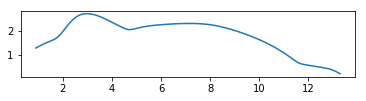

In [20]:
t = np.arange(0.9,13.3+0.01,0.01)  # x[-1] is the last entry of the array x
plt.plot(t, cd(t))
plt.axes().set_aspect('equal')
plt.show()